# Exercice 5

On réutilise les fonctions de l'exercice 1 et on applique les bon noyau de convolution pour répondres aux demandes.

In [60]:
from skimage import io
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image: np.ndarray = io.imread('data/Fry.bmp')


Pour détecter des contours pour une image en niveau de gris. Cela correspond au filtre de Sobel.

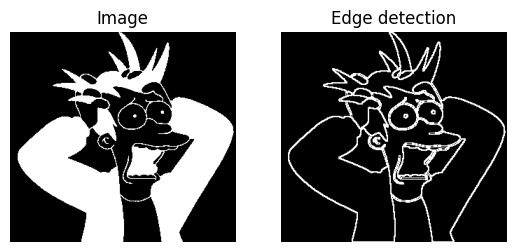

In [61]:
def apply_kernel(image: np.ndarray, kernel_x: np.ndarray, kernel_y: np.ndarray,  threshold: np.float32) -> np.ndarray:
    if len(image.shape) != 2:
        raise ValueError('Image must be 2D')
    if len(kernel_x.shape) != 2 or len(kernel_y.shape) != 2:
        raise ValueError('Kernel must be 2D')
    if kernel_x.shape[0] % 2 == 0 or kernel_x.shape[1] % 2 == 0 or kernel_y.shape[0] % 2 == 0 or kernel_y.shape[1] % 2 == 0:
        raise ValueError('Kernel must have odd dimensions')
    if (kernel_x.dtype or kernel_y.dtype) not in (np.float32, np.float64):
        raise ValueError('Kernel must have floating point type')
    convolved_x = ndimage.convolve(image, kernel_x, mode='constant', cval=0.0)
    convolved_y = ndimage.convolve(image, kernel_y, mode='constant', cval=0.0)
    convolved = np.sqrt(np.square(convolved_x) + np.square(convolved_y))
    binary = np.where(convolved > threshold, 1, 0)
    return binary

kernel_x: np.ndarray = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
kernel_y: np.ndarray = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image, cmap='gray')
ax[1].imshow(apply_kernel(image, kernel_x, kernel_y, 0), cmap='gray')
for i in range(2):
    ax[i].axis('off')
ax[0].set_title('Image')
ax[1].set_title('Edge detection')
plt.show()

Pour détecter des contours pour une image rgb. On procède de la même façon mais on doit premièrement convertir l'image en niveau de gris. On pourrait faire une moyenne mais on va utiliser une moyenne pondérée qui est plus adaptée à la perception humaine : I = 0.299 R + 0.587 G + 0.114 B.

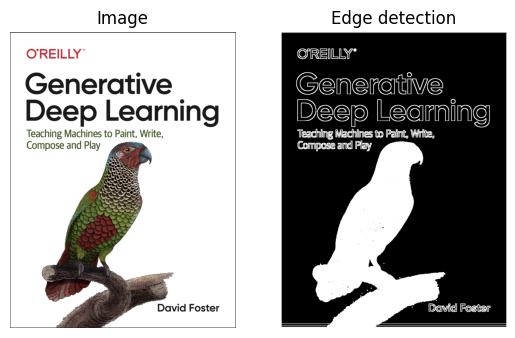

In [62]:
image_rgb: np.ndarray = io.imread('data/rgb_image.png')
gray_scale: np.ndarray = np.dot(image_rgb[..., :3], [0.299, 0.587, 0.114])
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_rgb)
ax[1].imshow(apply_kernel(gray_scale, kernel_x, kernel_y, 0.5), cmap='gray')
for i in range(2):
    ax[i].axis('off')
ax[0].set_title('Image')
ax[1].set_title('Edge detection')
plt.show()

Pour appliquer un flou moyenneur pour une image en niveau de gris. On fait varier la taille du noyau pour augmenter le fou.

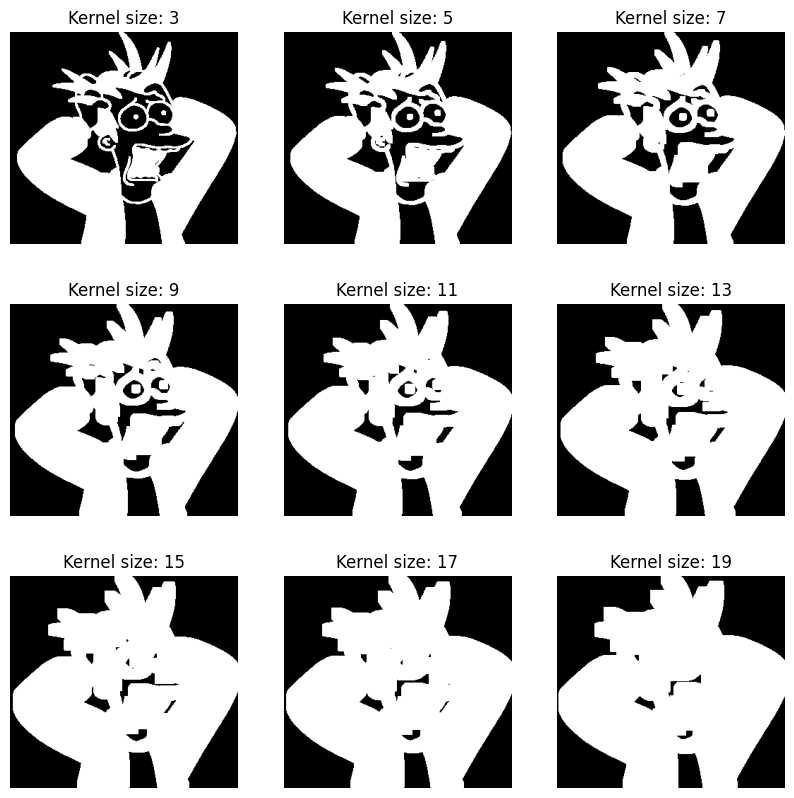

In [63]:
def apply_kernel(image: np.ndarray, kernel: np.ndarray, threshold: np.float32) -> np.ndarray:
    if len(image.shape) != 2:
        raise ValueError('Image must be 2D')
    if len(kernel.shape) != 2:
        raise ValueError('Kernel must be 2D')
    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError('Kernel must have odd dimensions')
    if kernel.dtype not in (np.float32, np.float64):
        raise ValueError('Kernel must have floating point type')
    convolved: np.ndarray = ndimage.convolve(image, kernel, mode='constant', cval=0.0)
    binary: np.ndarray = np.where(convolved > threshold, 1, 0)
    return binary

min: int = 3
max: int =  20
step: int = 2
sizes: int = np.arange(min, max, step)
fig, axies = plt.subplots(3, 3, figsize=(10, 10))
for i, size in enumerate(sizes):
    kernel: np.ndarray = np.ones((size, size), dtype=np.float32) / size**2
    axies[i // 3, i % 3].imshow(apply_kernel(image, kernel, 0.5), cmap='gray')
    axies[i // 3, i % 3].set_title(f'Kernel size: {size}')
    axies[i // 3, i % 3].axis('off')
plt.show()
    